# Base de dados do Census populacional

## Ferramentas globais

In [1]:
!pip install plotly --upgrade

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # visualização 
import matplotlib.pyplot as plt # visualização
import plotly.express as px # graficos dinamicos

In [2]:
base_census = pd.read_csv('census.csv')

## Data Exploration

In [3]:
base_census.head()

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K  
3             0             0             40   United-States   <=50K  
4             0             0             40            Cuba   <=50K

In [4]:
base_census.shape # (linha, coluna)

(32561, 15)

In [5]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [6]:
base_census.isnull().sum() # verificar se tem valores faltante 

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

## Data Visualization

In [7]:
np.unique(base_census['income'], return_counts=True) # checando quantos valores exclusivos temos

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

#### Comparando as classes e checando a diferença

<Axes: xlabel='income', ylabel='count'>

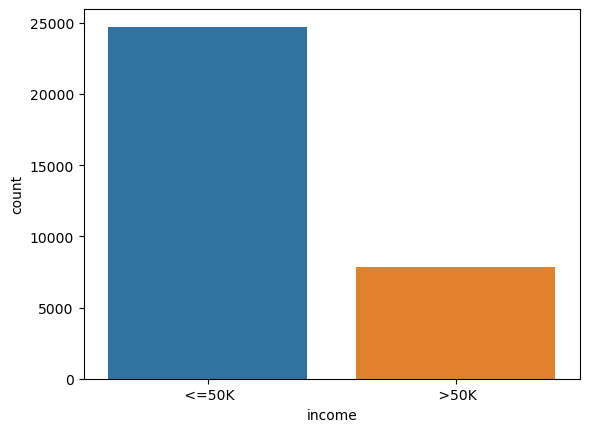

In [8]:
sns.countplot(x = base_census['income'])

#### Análise do Histograma e entender o que compõe o dataframe

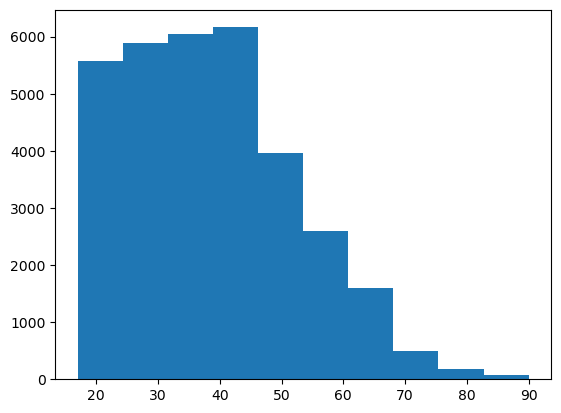

In [9]:
plt.hist(x = base_census['age']);

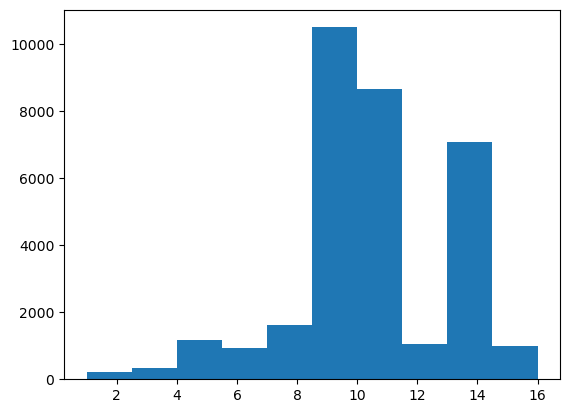

In [10]:
plt.hist(x = base_census['education-num']);

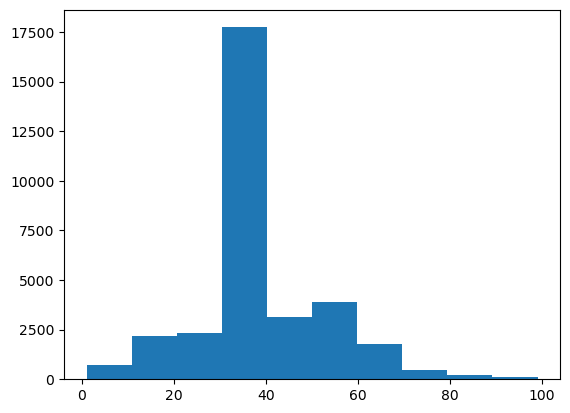

In [11]:
plt.hist(x = base_census['hour-per-week']);

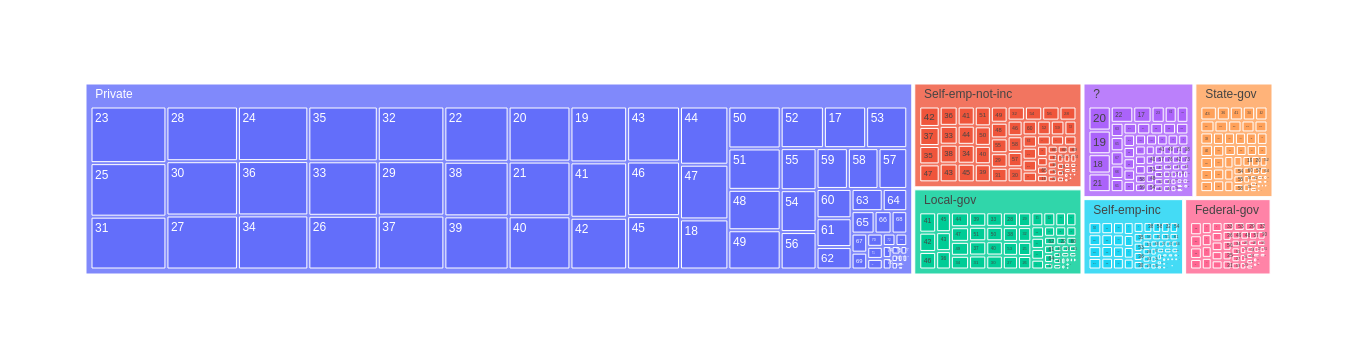

In [14]:
plot = px.treemap(base_census, path=['workclass', 'age'])
plot.show()

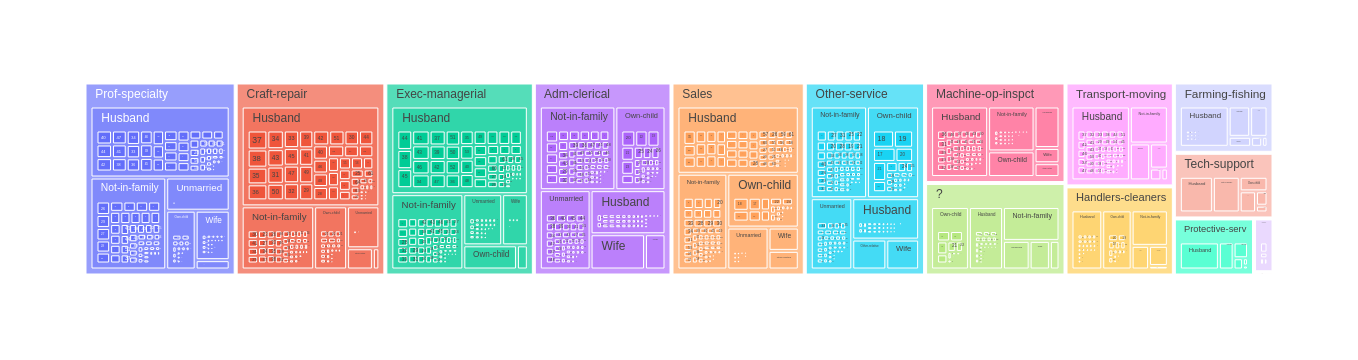

In [15]:
plot = px.treemap(base_census, path=['occupation','relationship','age'])
plot.show()

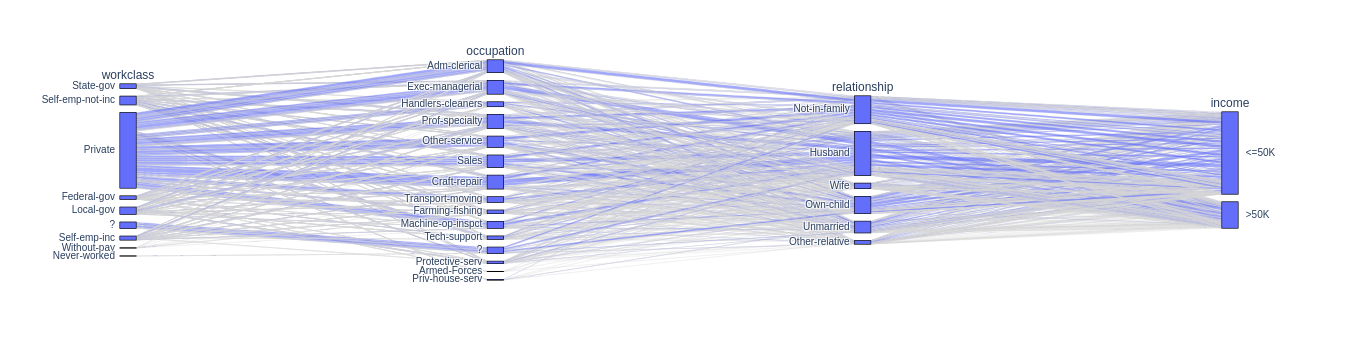

In [16]:
plot = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'relationship', 'income'])
plot.show()

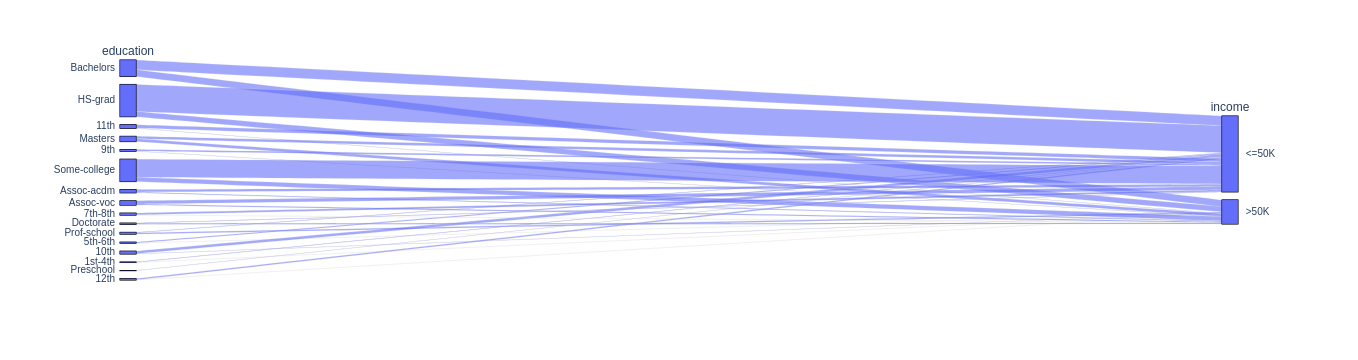

In [17]:
plot = px.parallel_categories(base_census, dimensions=['education', 'income'])
plot.show()

## Divisão entre previsores e classe

In [18]:
"""
    x = previsoras
    y = classe
    
    .values é para fazer a conversão para o numpy
"""

x_census = base_census.iloc[:, 0:14].values
y_census = base_census.iloc[:, 14].values

## Tratamento de atributos categóricos

### LabelEncoder

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder_testing = LabelEncoder()

In [21]:
x_census[:, 1] # coluna workclass em formato numpy

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [22]:
teste = label_encoder_testing.fit_transform(x_census[:, 1]) # transformação para trabalhar com machine learning. Pois não é possível trabalhar com strings. Ou seja, vamos ter que transformar em números

In [23]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [24]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

x_census[:, 1] = label_encoder_workclass.fit_transform(x_census[:, 1])
x_census[:, 3] = label_encoder_education.fit_transform(x_census[:, 3])
x_census[:, 5] = label_encoder_marital.fit_transform(x_census[:, 5])
x_census[:, 6] = label_encoder_occupation.fit_transform(x_census[:, 6])
x_census[:, 7] = label_encoder_relationship.fit_transform(x_census[:, 7])
x_census[:, 8] = label_encoder_race.fit_transform(x_census[:, 8])
x_census[:, 9] = label_encoder_sex .fit_transform(x_census[:, 9])
x_census[:, 13] = label_encoder_country.fit_transform(x_census[:, 13])

In [25]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

## OneHotEncoder

In [26]:
len(np.unique(base_census['workclass']))

9

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [28]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [29]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [30]:
x_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

## Escalonamento dos valores

In [31]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [32]:
x_census

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

In [ ]:
## Divisão das bases em treinamento e teste

In [33]:
from sklearn.model_selection import train_test_split

In [39]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)

In [40]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [41]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

## Salvar as variáveis

In [42]:
import pickle

In [43]:
with open('census.pkl', mode = 'wb') as f:
    pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f)